In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 设置 seaborn 背景样式
sns.set_style('whitegrid')

In [3]:
# 使得可以在 notebook 中绘图
%matplotlib inline

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()
print '--------------------------------'
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object


In [6]:
 # 去除无关列
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df = test_df.drop(['Name','Ticket'], axis=1)

In [7]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
from scipy.stats import mode
mode(train_df['Embarked'].dropna()).mode[0]

D:\Python\Anaconda\Anaconda2.7\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'S'

### 逐个进行分析特征，找到有用特征

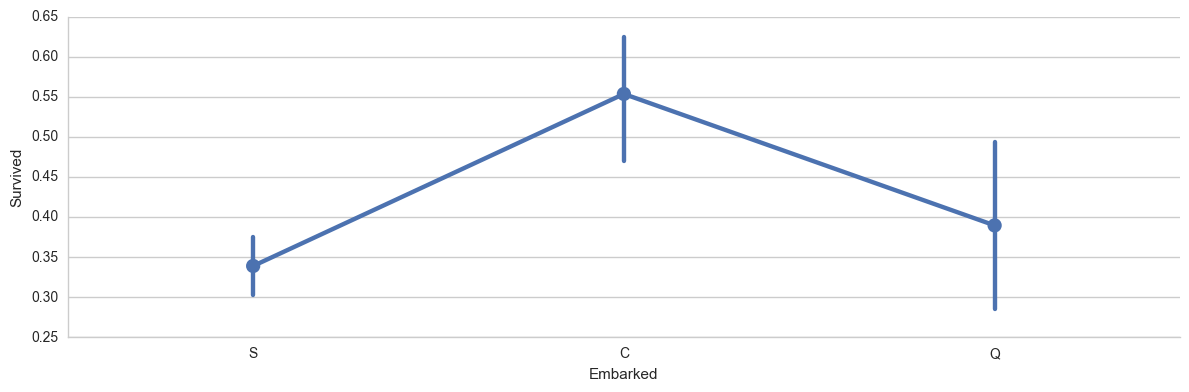

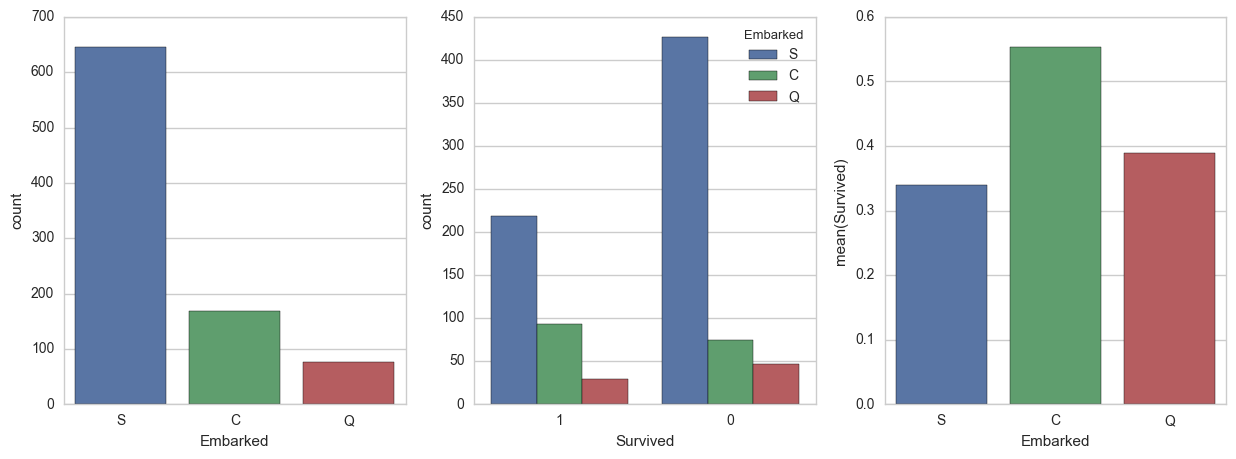

In [9]:
# Embarked
# 关于Embarked 只有两个缺失值，填充，使用众数填充
train_df['Embarked'] = train_df['Embarked'].fillna('S')

# 传入DataFrame变量参数，第一维x轴，第二维y轴（所有值的均值）,size控制高度，size*aspect控制宽度，hue参数表示在同一个图中作比较，
# row/col表示在水平或者垂直方向作比较，kind可以设置图表类型
sns.factorplot('Embarked','Survived',data = train_df, size = 4, aspect=3)

# 创建多个画布
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# 在指定画布上绘制直方图
sns.countplot(x='Embarked', data=train_df, ax = axis1)
sns.countplot(x='Survived',hue='Embarked', data=train_df,order=[1,0], ax=axis2)
sns.barplot(x='Embarked',y='Survived',ci=None,data=train_df,ax=axis3)

In [10]:
# 从理论上来说，为了方便，我们可以直接删除Embarked这一列
# 这个方案说，由于Embarked S的存活率太低，所以删除，我觉得有问题，因为这样才能体现区分度，适合模型训练

# pd.get_dummies方法 根据属性值的类别，生成新的特征，特征值为0或1
embark_dummies_titanic = pd.get_dummies(train_df['Embarked'])
embark_dummies_titanic.drop(['S'],axis=1, inplace=True)

embark_dummies_test = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

# 合并特征
train_df = train_df.join(embark_dummies_titanic)
test_df = test_df.join(embark_dummies_test)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q
0,0,3,male,22.0,1,0,7.2500,NaN,S,0.0,0.0
1,1,1,female,38.0,1,0,71.2833,C85,C,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0.0,0.0
3,1,1,female,35.0,1,0,53.1000,C123,S,0.0,0.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0.0,0.0
5,0,3,male,NaN,0,0,8.4583,NaN,Q,0.0,1.0
6,0,1,male,54.0,0,0,51.8625,E46,S,0.0,0.0
7,0,3,male,2.0,3,1,21.0750,NaN,S,0.0,0.0
8,1,3,female,27.0,0,2,11.1333,NaN,S,0.0,0.0
9,1,2,female,14.0,1,0,30.0708,NaN,C,1.0,0.0


In [11]:
# Embarked 已经由 其值 C Q代替，故删除Embarked这列
train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'],axis=1, inplace=True)

In [12]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q
0,0,3,male,22.0,1,0,7.2500,NaN,0.0,0.0
1,1,1,female,38.0,1,0,71.2833,C85,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,NaN,0.0,0.0
3,1,1,female,35.0,1,0,53.1000,C123,0.0,0.0
4,0,3,male,35.0,0,0,8.0500,NaN,0.0,0.0
5,0,3,male,NaN,0,0,8.4583,NaN,0.0,1.0
6,0,1,male,54.0,0,0,51.8625,E46,0.0,0.0
7,0,3,male,2.0,3,1,21.0750,NaN,0.0,0.0
8,1,3,female,27.0,0,2,11.1333,NaN,0.0,0.0
9,1,2,female,14.0,1,0,30.0708,NaN,1.0,0.0
